# Cut Binning

## Read CSV

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("final.csv")

print(df.head())

   Unnamed: 0  0    month        town flat_type block        street_name  \
0           0  0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10   
1           1  1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4   
2           2  2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5   
3           3  3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10   
4           4  4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5   

  storey_range  floor_area_sqm      flat_model  lease_commence_date  \
0     10 TO 12            44.0        Improved                 1979   
1     01 TO 03            67.0  New Generation                 1978   
2     01 TO 03            67.0  New Generation                 1980   
3     04 TO 06            68.0  New Generation                 1980   
4     01 TO 03            67.0  New Generation                 1980   

      remaining_lease  resale_price postal_code       lat        long  \
0  61 years 04 months      232000.0      56

/Users/josiahkhoo/miniforge3/envs/libsvm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Feature engineering

In [27]:
def get_remaining_lease_val(remaining_lease):
    spl = remaining_lease.split(' ')
    years = int(spl[0])
    try:
        months = int(spl[2])
    except:
        months = 0
    return years * 12 + months

print(get_remaining_lease_val(df.iloc[0].remaining_lease))

def get_month_val(month):
    """
    Calculate number of months from first month (2017, 01)
    """
    spl = month.split('-')
    year = int(spl[0])
    month = int(spl[1])
    return (year - 2017) * 12 + month - 1

print(get_month_val(df.iloc[0].month))

def get_flat_type_val(flat_type):
    return {"1 ROOM": 0, "2 ROOM": 1, "3 ROOM": 2, "4 ROOM": 3, "5 ROOM": 4, "EXECUTIVE": 5, "MULTI-GENERATION": 6 }[flat_type]

print(get_flat_type_val(df.iloc[0].flat_type))

def get_storey_range_val(storey_range):
    return {
        "01 TO 03":0,
        "04 TO 06":1,
        "07 TO 09":2,
        "10 TO 12":3,
        "13 TO 15":4,
        "16 TO 18":5,
        "19 TO 21":6,
        "22 TO 24":7,
        "25 TO 27":8,
        "28 TO 30":9,
        "31 TO 33":10,
        "34 TO 36":11,
        "37 TO 39":12,
        "40 TO 42":13,
        "43 TO 45":14,
        "46 TO 48":15,
        "49 TO 51":16}[storey_range]

print(get_storey_range_val(df.iloc[0].storey_range))

736
0
1
3


In [28]:
new = []

for row in df.itertuples():
    remaining_lease_val = get_remaining_lease_val(row.remaining_lease)
    month_val = get_month_val(row.month)
    flat_type_val = get_flat_type_val(row.flat_type)
    storey_range_val = get_storey_range_val(row.storey_range)
    new.append({'remaining_lease_val': remaining_lease_val, 'month_val': month_val, 'flat_type_val': flat_type_val, 'storey_range_val': storey_range_val})

df = pd.concat([df, pd.DataFrame(new)], axis=1)
df.tail()

,Unnamed: 0,0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,postal_code,lat,long,distance_nearest_mrt,nearest_mrt,mrt_or_lrt,remaining_lease_val,month_val,flat_type_val,storey_range_val
111033,111033,111507,2021-10,YISHUN,EXECUTIVE,736,YISHUN ST 72,07 TO 09,162.0,Adjoined flat,...,760736,1.428658,103.831728,0.385516,Yishun,MRT,745,57,5,2
111034,111034,111508,2021-10,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,...,760834,1.415088,103.834000,0.281346,Khatib,MRT,784,57,5,1
111035,111035,111509,2021-10,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,145.0,Apartment,...,760828,1.415191,103.832902,0.247029,Khatib,MRT,784,57,5,0
111036,111036,111510,2021-10,YISHUN,EXECUTIVE,826,YISHUN ST 81,07 TO 09,145.0,Apartment,...,760826,1.414174,103.832454,0.364253,Khatib,MRT,784,57,5,2
111037,111037,111511,2021-10,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,01 TO 03,164.0,Multi Generation,...,760632,1.418567,103.839187,0.700596,Khatib,MRT,781,57,6,0


In [29]:
# one hot encoding
one_hot = pd.get_dummies(df['town'])
# Drop column B as it is now encoded
df = df.drop('town',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df  

,Unnamed: 0,0,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,0,0,2017-01,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2017-01,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2017-01,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0,0,0,0,0,0,0,0,0,0
3,3,3,2017-01,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2017-01,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111033,111033,111507,2021-10,EXECUTIVE,736,YISHUN ST 72,07 TO 09,162.0,Adjoined flat,1984,...,0,0,0,0,0,0,0,0,0,1
111034,111034,111508,2021-10,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,...,0,0,0,0,0,0,0,0,0,1
111035,111035,111509,2021-10,EXECUTIVE,828,YISHUN ST 81,01 TO 03,145.0,Apartment,1988,...,0,0,0,0,0,0,0,0,0,1
111036,111036,111510,2021-10,EXECUTIVE,826,YISHUN ST 81,07 TO 09,145.0,Apartment,1988,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# one hot encoding
one_hot = pd.get_dummies(df['flat_model'])
# Drop column B as it is now encoded
df = df.drop('flat_model',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df  

,Unnamed: 0,0,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,0,0,2017-01,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,1979,61 years 04 months,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2017-01,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,1978,60 years 07 months,...,0,1,0,0,0,0,0,0,0,0
2,2,2,2017-01,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,...,0,1,0,0,0,0,0,0,0,0
3,3,3,2017-01,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,1980,62 years 01 month,...,0,1,0,0,0,0,0,0,0,0
4,4,4,2017-01,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111033,111033,111507,2021-10,EXECUTIVE,736,YISHUN ST 72,07 TO 09,162.0,1984,62 years 01 month,...,0,0,0,0,0,0,0,0,0,0
111034,111034,111508,2021-10,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,1988,65 years 04 months,...,0,0,0,0,0,0,0,0,0,0
111035,111035,111509,2021-10,EXECUTIVE,828,YISHUN ST 81,01 TO 03,145.0,1988,65 years 04 months,...,0,0,0,0,0,0,0,0,0,0
111036,111036,111510,2021-10,EXECUTIVE,826,YISHUN ST 81,07 TO 09,145.0,1988,65 years 04 months,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df = df.drop(columns=['Unnamed: 0', '0', 'month', 'flat_type', 'block', 'street_name', 'storey_range', 'lease_commence_date', 'remaining_lease', 'postal_code', 'lat', 'long', 'nearest_mrt', 'mrt_or_lrt'])

In [32]:
# Split resale price into 100 bins and drop resale price
output_classes = 50
df = df.assign(resale_price_range=pd.cut(df['resale_price'], bins=output_classes, labels=False))

In [33]:
#round this to the nearest 1dp
df['distance_nearest_mrt'] = df['distance_nearest_mrt'].round(decimals = 1)
df["distance_nearest_mrt"].nunique() 

24

In [34]:
#round to nearest 5
def custom_round(x, base=10):
    return int(base * round(float(x)/base))
  
df["remaining_lease_val"] = df["remaining_lease_val"].apply(lambda x: custom_round(x, base=10))
df["remaining_lease_val"].nunique()

66

In [35]:
df["floor_area_sqm"] = df["floor_area_sqm"].apply(lambda x: custom_round(x, base=10))
df["floor_area_sqm"].nunique() 

22

In [36]:
cols = list(df.columns)
a, b = cols.index('resale_price_range'), cols.index('floor_area_sqm')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]
df.head()

,resale_price_range,resale_price,distance_nearest_mrt,remaining_lease_val,month_val,flat_type_val,storey_range_val,ANG MO KIO,BEDOK,BISHAN,...,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2,floor_area_sqm
0,3,232000.0,1.0,740,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,40
1,4,250000.0,1.3,730,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,70
2,5,262000.0,1.1,750,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,70
3,5,265000.0,0.9,740,0,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,70
4,5,265000.0,1.1,750,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,70


In [37]:
df.isnull().values.any() #check for NaN values in dataframe

False

In [38]:
#df['resale_price'].isnull().sum()
df['resale_price_range'].isnull().any()

False

In [39]:
#since above returns true, drop all rows with na
df = df.dropna() 

In [40]:
#make sure these returns false
df['resale_price_range'].isnull().any()
df.isnull().values.any()

False

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split #shuffle is true by default
from sklearn.preprocessing import StandardScaler

labels=df['resale_price_range']
features = df.iloc[:, 1:52]

X=features
y=np.ravel(labels) #create an array from the Pandas series labels.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#normalise data 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout

In [43]:
y_train = to_categorical(y_train -1,num_classes=output_classes, dtype ="uint8")
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
y_test = to_categorical(y_test-1, num_classes=output_classes, dtype ="uint8")

## Training

In [45]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(51,)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_classes, activation='softmax')) #4 output classes

opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy']) #multi class classification
                  
model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
76/76 [==============================] - 0s 4ms/step - loss: 2.6525 - accuracy: 0.1602
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 2.0009 - accuracy: 0.2605
Epoch 3/100
76/76 [==============================] - 0s 4ms/step - loss: 1.6804 - accuracy: 0.3504
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 1.4399 - accuracy: 0.4325
Epoch 5/100
76/76 [==============================] - 0s 5ms/step - loss: 1.2480 - accuracy: 0.5115
Epoch 6/100
76/76 [==============================] - 0s 6ms/step - loss: 1.0958 - accuracy: 0.5754
Epoch 7/100
76/76 [==============================] - 0s 4ms/step - loss: 0.9776 - accuracy: 0.6248
Epoch 8/100
76/76 [==============================] - 0s 5ms/step - loss: 0.8783 - accuracy: 0.6651
Epoch 9/100
76/76 [==============================] - 0s 5ms/step - loss: 0.7968 - accuracy: 0.6979
Epoch 10/100
76/76 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.7258
Epoch 11/

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               10400     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                10050     
Total params: 60,650
Trainable params: 60,650
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Keras reported accuracy
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1])) 

1041/1041 [==============================] - 0s 383us/step - loss: 0.2029 - accuracy: 0.9203
Test set
  Loss: 0.203
  Accuracy: 0.920


In [48]:
# Actual accuracy calculated manually
import numpy as np
y_pred = model.predict(X_test)
acc = sum([np.argmax(y_test[i])==np.argmax(y_pred[i]) for i in range(10000)])/10000
print(acc)

0.9197


<AxesSubplot:>

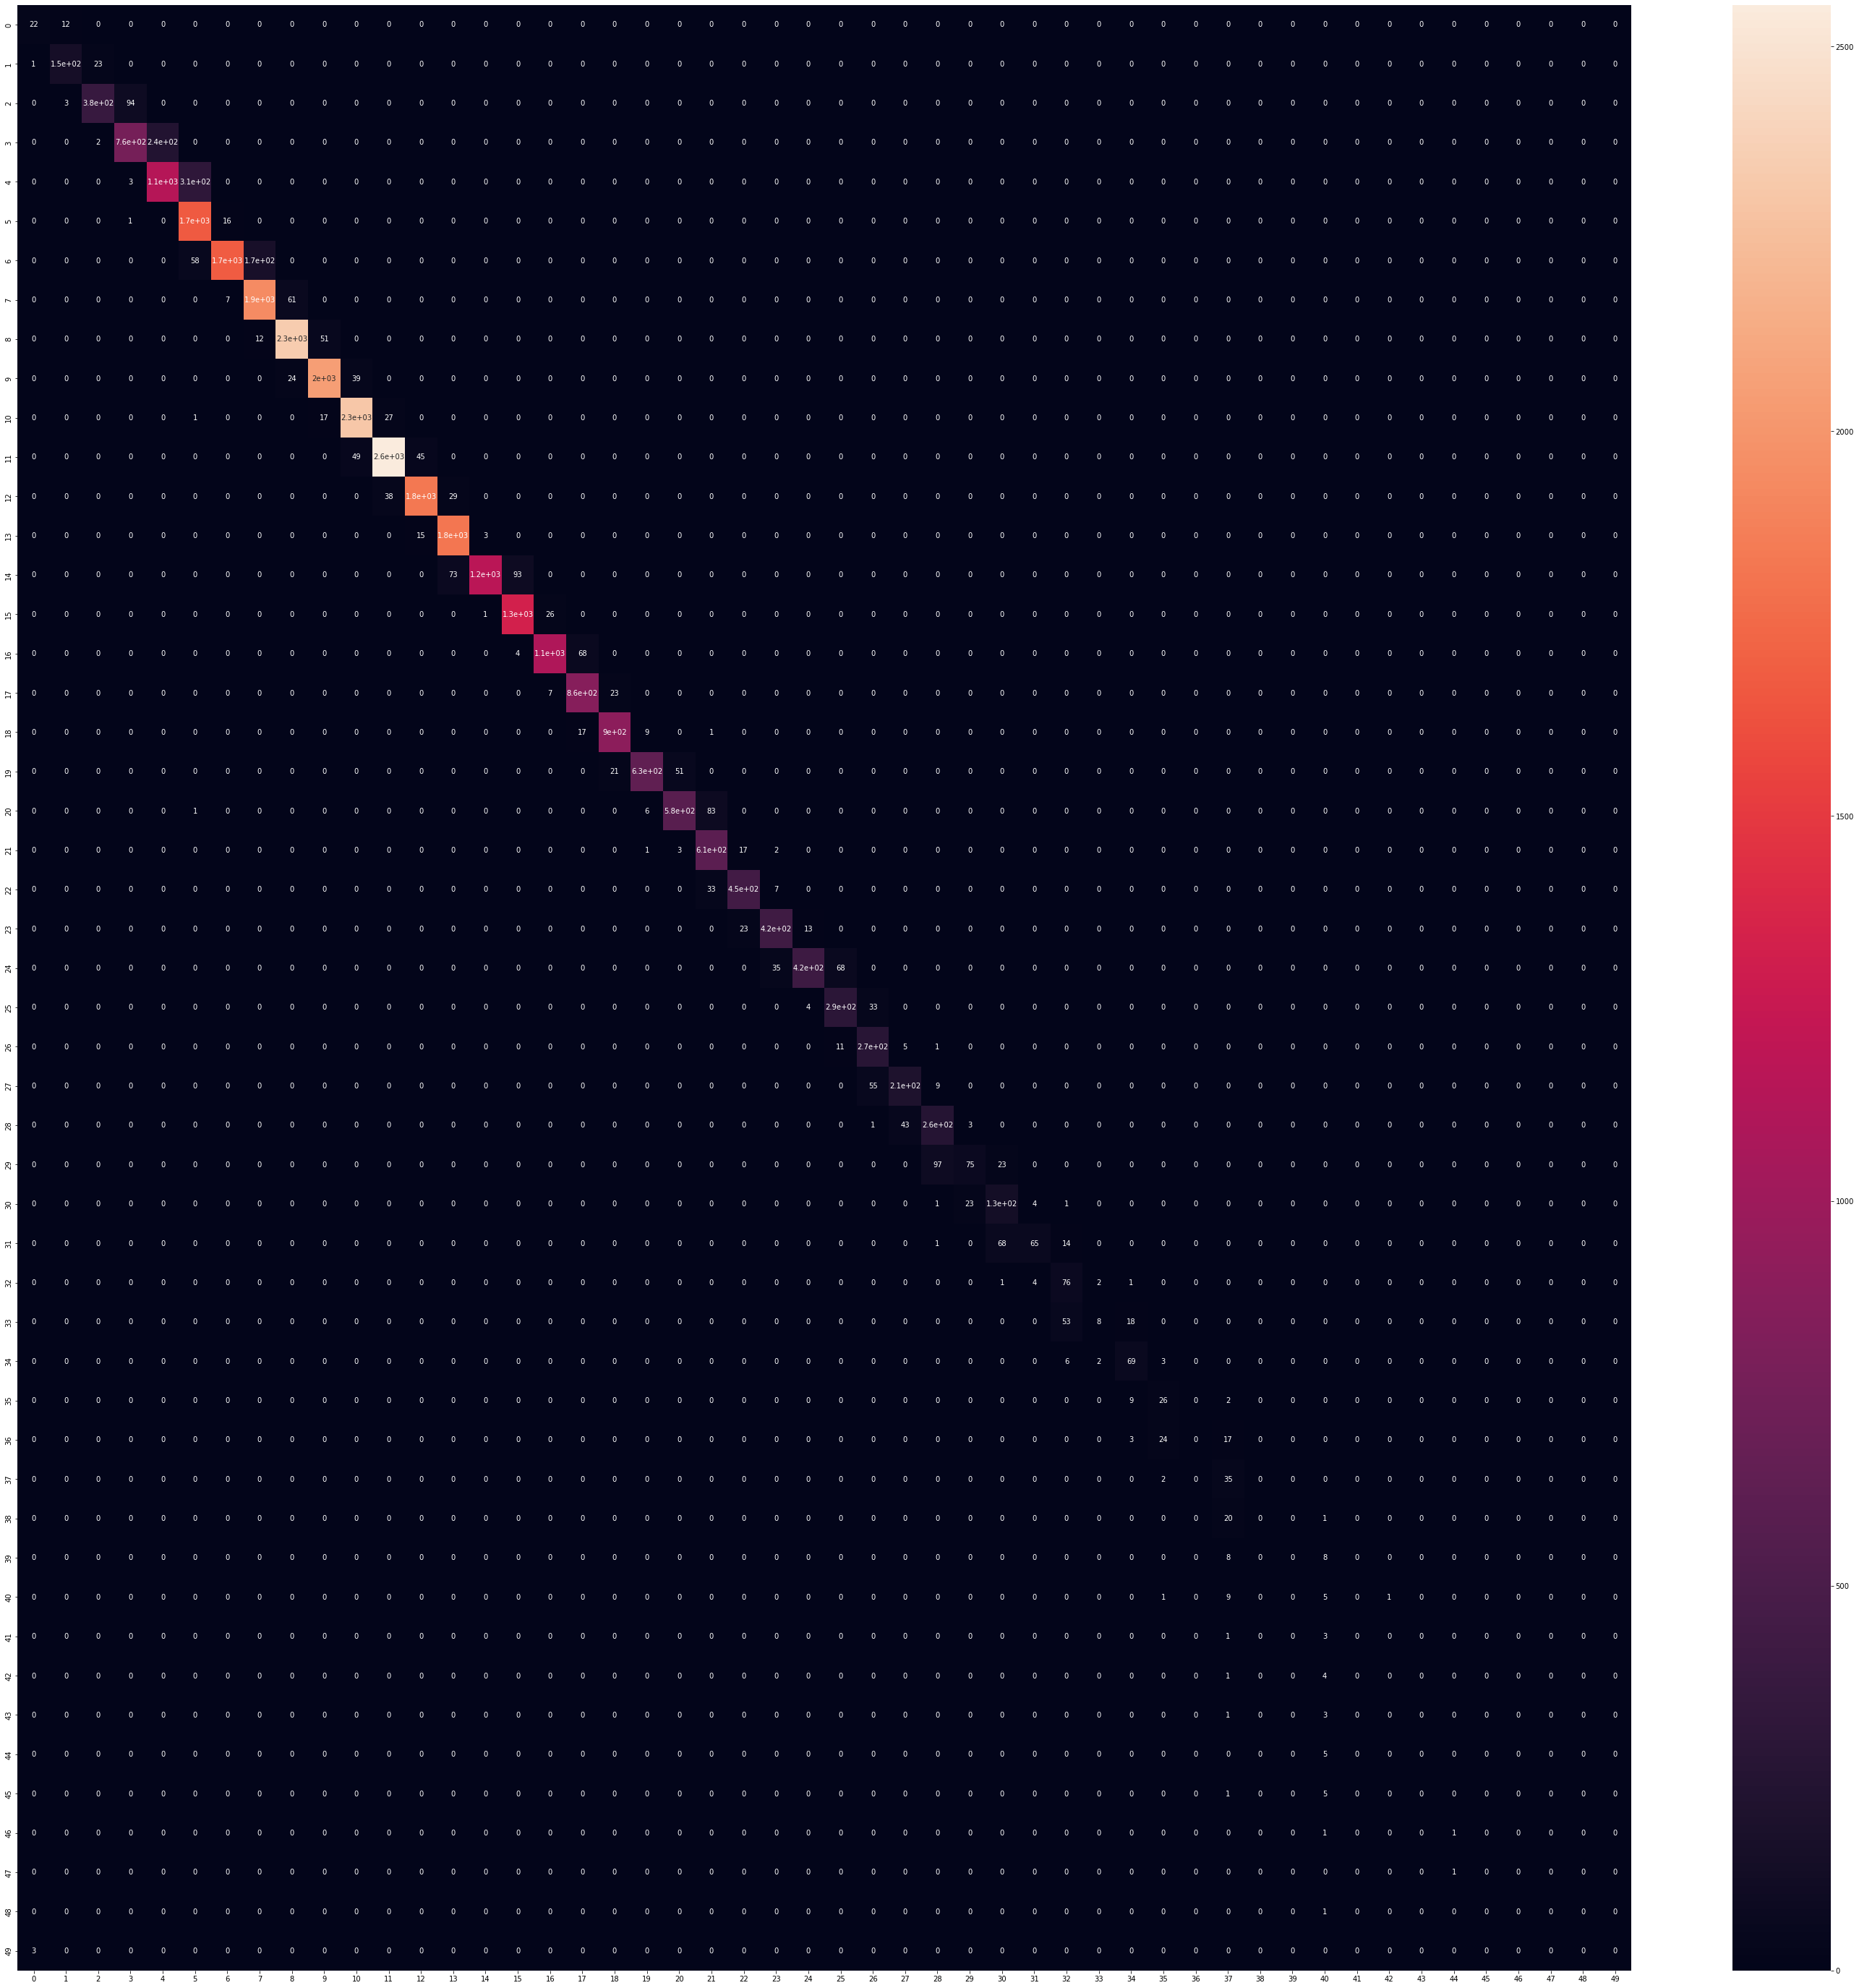

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Confusion matrix 
predict_x=model.predict(X_test) 
y_pred_class=np.argmax(predict_x,axis=1)

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
array = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(output_classes,output_classes))
sn.heatmap(array, annot=True)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73        34
           1       0.91      0.86      0.88       171
           2       0.94      0.80      0.86       474
           3       0.89      0.76      0.82      1004
           4       0.83      0.78      0.81      1453
           5       0.82      0.99      0.90      1690
           6       0.99      0.88      0.93      1901
           7       0.92      0.97      0.94      2009
           8       0.96      0.97      0.97      2404
           9       0.97      0.97      0.97      2111
          10       0.96      0.98      0.97      2357
          11       0.98      0.96      0.97      2648
          12       0.97      0.96      0.97      1899
          13       0.95      0.99      0.97      1837
          14       1.00      0.88      0.93      1343
          15       0.93      0.98      0.96      1361
          16       0.97      0.94      0.95      1171
          17       0.91    

/Users/josiahkhoo/miniforge3/envs/libsvm/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/josiahkhoo/miniforge3/envs/libsvm/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/josiahkhoo/miniforge3/envs/libsvm/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

# Quantile Binning

## Read CSV

In [51]:
df = pd.read_csv("final.csv")

/Users/josiahkhoo/miniforge3/envs/libsvm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Feature engineering

In [52]:
def get_remaining_lease_val(remaining_lease):
    spl = remaining_lease.split(' ')
    years = int(spl[0])
    try:
        months = int(spl[2])
    except:
        months = 0
    return years * 12 + months

print(get_remaining_lease_val(df.iloc[0].remaining_lease))

def get_month_val(month):
    """
    Calculate number of months from first month (2017, 01)
    """
    spl = month.split('-')
    year = int(spl[0])
    month = int(spl[1])
    return (year - 2017) * 12 + month - 1

print(get_month_val(df.iloc[0].month))

def get_flat_type_val(flat_type):
    return {"1 ROOM": 0, "2 ROOM": 1, "3 ROOM": 2, "4 ROOM": 3, "5 ROOM": 4, "EXECUTIVE": 5, "MULTI-GENERATION": 6 }[flat_type]

print(get_flat_type_val(df.iloc[0].flat_type))

def get_storey_range_val(storey_range):
    return {
        "01 TO 03":0,
        "04 TO 06":1,
        "07 TO 09":2,
        "10 TO 12":3,
        "13 TO 15":4,
        "16 TO 18":5,
        "19 TO 21":6,
        "22 TO 24":7,
        "25 TO 27":8,
        "28 TO 30":9,
        "31 TO 33":10,
        "34 TO 36":11,
        "37 TO 39":12,
        "40 TO 42":13,
        "43 TO 45":14,
        "46 TO 48":15,
        "49 TO 51":16}[storey_range]

print(get_storey_range_val(df.iloc[0].storey_range))

736
0
1
3


In [53]:
new = []

for row in df.itertuples():
    remaining_lease_val = get_remaining_lease_val(row.remaining_lease)
    month_val = get_month_val(row.month)
    flat_type_val = get_flat_type_val(row.flat_type)
    storey_range_val = get_storey_range_val(row.storey_range)
    new.append({'remaining_lease_val': remaining_lease_val, 'month_val': month_val, 'flat_type_val': flat_type_val, 'storey_range_val': storey_range_val})

df = pd.concat([df, pd.DataFrame(new)], axis=1)
df.tail()

,Unnamed: 0,0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,...,postal_code,lat,long,distance_nearest_mrt,nearest_mrt,mrt_or_lrt,remaining_lease_val,month_val,flat_type_val,storey_range_val
111033,111033,111507,2021-10,YISHUN,EXECUTIVE,736,YISHUN ST 72,07 TO 09,162.0,Adjoined flat,...,760736,1.428658,103.831728,0.385516,Yishun,MRT,745,57,5,2
111034,111034,111508,2021-10,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,...,760834,1.415088,103.834000,0.281346,Khatib,MRT,784,57,5,1
111035,111035,111509,2021-10,YISHUN,EXECUTIVE,828,YISHUN ST 81,01 TO 03,145.0,Apartment,...,760828,1.415191,103.832902,0.247029,Khatib,MRT,784,57,5,0
111036,111036,111510,2021-10,YISHUN,EXECUTIVE,826,YISHUN ST 81,07 TO 09,145.0,Apartment,...,760826,1.414174,103.832454,0.364253,Khatib,MRT,784,57,5,2
111037,111037,111511,2021-10,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,01 TO 03,164.0,Multi Generation,...,760632,1.418567,103.839187,0.700596,Khatib,MRT,781,57,6,0


In [54]:
# one hot encoding
one_hot = pd.get_dummies(df['town'])
# Drop column B as it is now encoded
df = df.drop('town',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df  

,Unnamed: 0,0,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,0,0,2017-01,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2017-01,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2017-01,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0,0,0,0,0,0,0,0,0,0
3,3,3,2017-01,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2017-01,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111033,111033,111507,2021-10,EXECUTIVE,736,YISHUN ST 72,07 TO 09,162.0,Adjoined flat,1984,...,0,0,0,0,0,0,0,0,0,1
111034,111034,111508,2021-10,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,...,0,0,0,0,0,0,0,0,0,1
111035,111035,111509,2021-10,EXECUTIVE,828,YISHUN ST 81,01 TO 03,145.0,Apartment,1988,...,0,0,0,0,0,0,0,0,0,1
111036,111036,111510,2021-10,EXECUTIVE,826,YISHUN ST 81,07 TO 09,145.0,Apartment,1988,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# one hot encoding
one_hot = pd.get_dummies(df['flat_model'])
# Drop column B as it is now encoded
df = df.drop('flat_model',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df  

,Unnamed: 0,0,month,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,0,0,2017-01,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,1979,61 years 04 months,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2017-01,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,1978,60 years 07 months,...,0,1,0,0,0,0,0,0,0,0
2,2,2,2017-01,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,...,0,1,0,0,0,0,0,0,0,0
3,3,3,2017-01,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,1980,62 years 01 month,...,0,1,0,0,0,0,0,0,0,0
4,4,4,2017-01,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,1980,62 years 05 months,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111033,111033,111507,2021-10,EXECUTIVE,736,YISHUN ST 72,07 TO 09,162.0,1984,62 years 01 month,...,0,0,0,0,0,0,0,0,0,0
111034,111034,111508,2021-10,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,1988,65 years 04 months,...,0,0,0,0,0,0,0,0,0,0
111035,111035,111509,2021-10,EXECUTIVE,828,YISHUN ST 81,01 TO 03,145.0,1988,65 years 04 months,...,0,0,0,0,0,0,0,0,0,0
111036,111036,111510,2021-10,EXECUTIVE,826,YISHUN ST 81,07 TO 09,145.0,1988,65 years 04 months,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df = df.drop(columns=['Unnamed: 0', '0', 'month', 'flat_type', 'block', 'street_name', 'storey_range', 'lease_commence_date', 'remaining_lease', 'postal_code', 'lat', 'long', 'nearest_mrt', 'mrt_or_lrt'])

In [57]:
# Split resale price into bins and drop resale price
output_classes = 50
df = df.assign(resale_price_range=pd.qcut(df['resale_price'], q=[i * 1 / output_classes for i in range(output_classes)] + [1], labels=False))

In [58]:
#round this to the nearest 1dp
df['distance_nearest_mrt'] = df['distance_nearest_mrt'].round(decimals = 1)
df["distance_nearest_mrt"].nunique() 

24

In [59]:
#round to nearest 5
def custom_round(x, base=10):
    return int(base * round(float(x)/base))
  
df["remaining_lease_val"] = df["remaining_lease_val"].apply(lambda x: custom_round(x, base=10))
df["remaining_lease_val"].nunique()

66

In [60]:
df["floor_area_sqm"] = df["floor_area_sqm"].apply(lambda x: custom_round(x, base=10))
df["floor_area_sqm"].nunique() 

22

In [61]:
cols = list(df.columns)
a, b = cols.index('resale_price_range'), cols.index('floor_area_sqm')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]
df.head()

,resale_price_range,resale_price,distance_nearest_mrt,remaining_lease_val,month_val,flat_type_val,storey_range_val,ANG MO KIO,BEDOK,BISHAN,...,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2,floor_area_sqm
0,1,232000.0,1.0,740,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,40
1,1,250000.0,1.3,730,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,70
2,3,262000.0,1.1,750,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,70
3,3,265000.0,0.9,740,0,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,70
4,3,265000.0,1.1,750,0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,70


In [62]:
df.isnull().values.any() #check for NaN values in dataframe

False

In [63]:
#df['resale_price'].isnull().sum()
df['resale_price_range'].isnull().any()

False

In [64]:
#since above returns true, drop all rows with na
df = df.dropna() 

In [65]:
#make sure these returns false
df['resale_price_range'].isnull().any()
df.isnull().values.any()

False

In [66]:
labels=df['resale_price_range']
features = df.iloc[:, 1:52]

X=features
y=np.ravel(labels) #create an array from the Pandas series labels.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#normalise data 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
y_train = to_categorical(y_train -1,num_classes=output_classes, dtype ="uint8")
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [68]:
y_test = to_categorical(y_test-1, num_classes=output_classes, dtype ="uint8")

## Training

In [69]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(51,)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_classes, activation='softmax')) #4 output classes

opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy']) #multi class classification
                  
model.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=1)

Epoch 1/100
76/76 [==============================] - 0s 4ms/step - loss: 3.2408 - accuracy: 0.0974
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 2.6401 - accuracy: 0.1521
Epoch 3/100
76/76 [==============================] - 0s 5ms/step - loss: 2.3239 - accuracy: 0.2038
Epoch 4/100
76/76 [==============================] - 0s 4ms/step - loss: 2.0819 - accuracy: 0.2519
Epoch 5/100
76/76 [==============================] - 0s 5ms/step - loss: 1.8868 - accuracy: 0.2962
Epoch 6/100
76/76 [==============================] - 0s 5ms/step - loss: 1.7308 - accuracy: 0.3340
Epoch 7/100
76/76 [==============================] - 0s 4ms/step - loss: 1.5981 - accuracy: 0.3741
Epoch 8/100
76/76 [==============================] - 0s 5ms/step - loss: 1.4803 - accuracy: 0.4087
Epoch 9/100
76/76 [==============================] - 0s 5ms/step - loss: 1.3807 - accuracy: 0.4436
Epoch 10/100
76/76 [==============================] - 0s 5ms/step - loss: 1.2936 - accuracy: 0.4753
Epoch 11/

In [70]:
#may be useful but not very
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               10400     
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                10050     
Total params: 60,650
Trainable params: 60,650
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Keras reported accuracy
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1])) 

1041/1041 [==============================] - 0s 332us/step - loss: 0.3696 - accuracy: 0.8451
Test set
  Loss: 0.370
  Accuracy: 0.845


In [72]:
# Actual accuracy calculated manually
y_pred = model.predict(X_test)
acc = sum([np.argmax(y_test[i])==np.argmax(y_pred[i]) for i in range(10000)])/10000
print(acc)

0.8438


<AxesSubplot:>

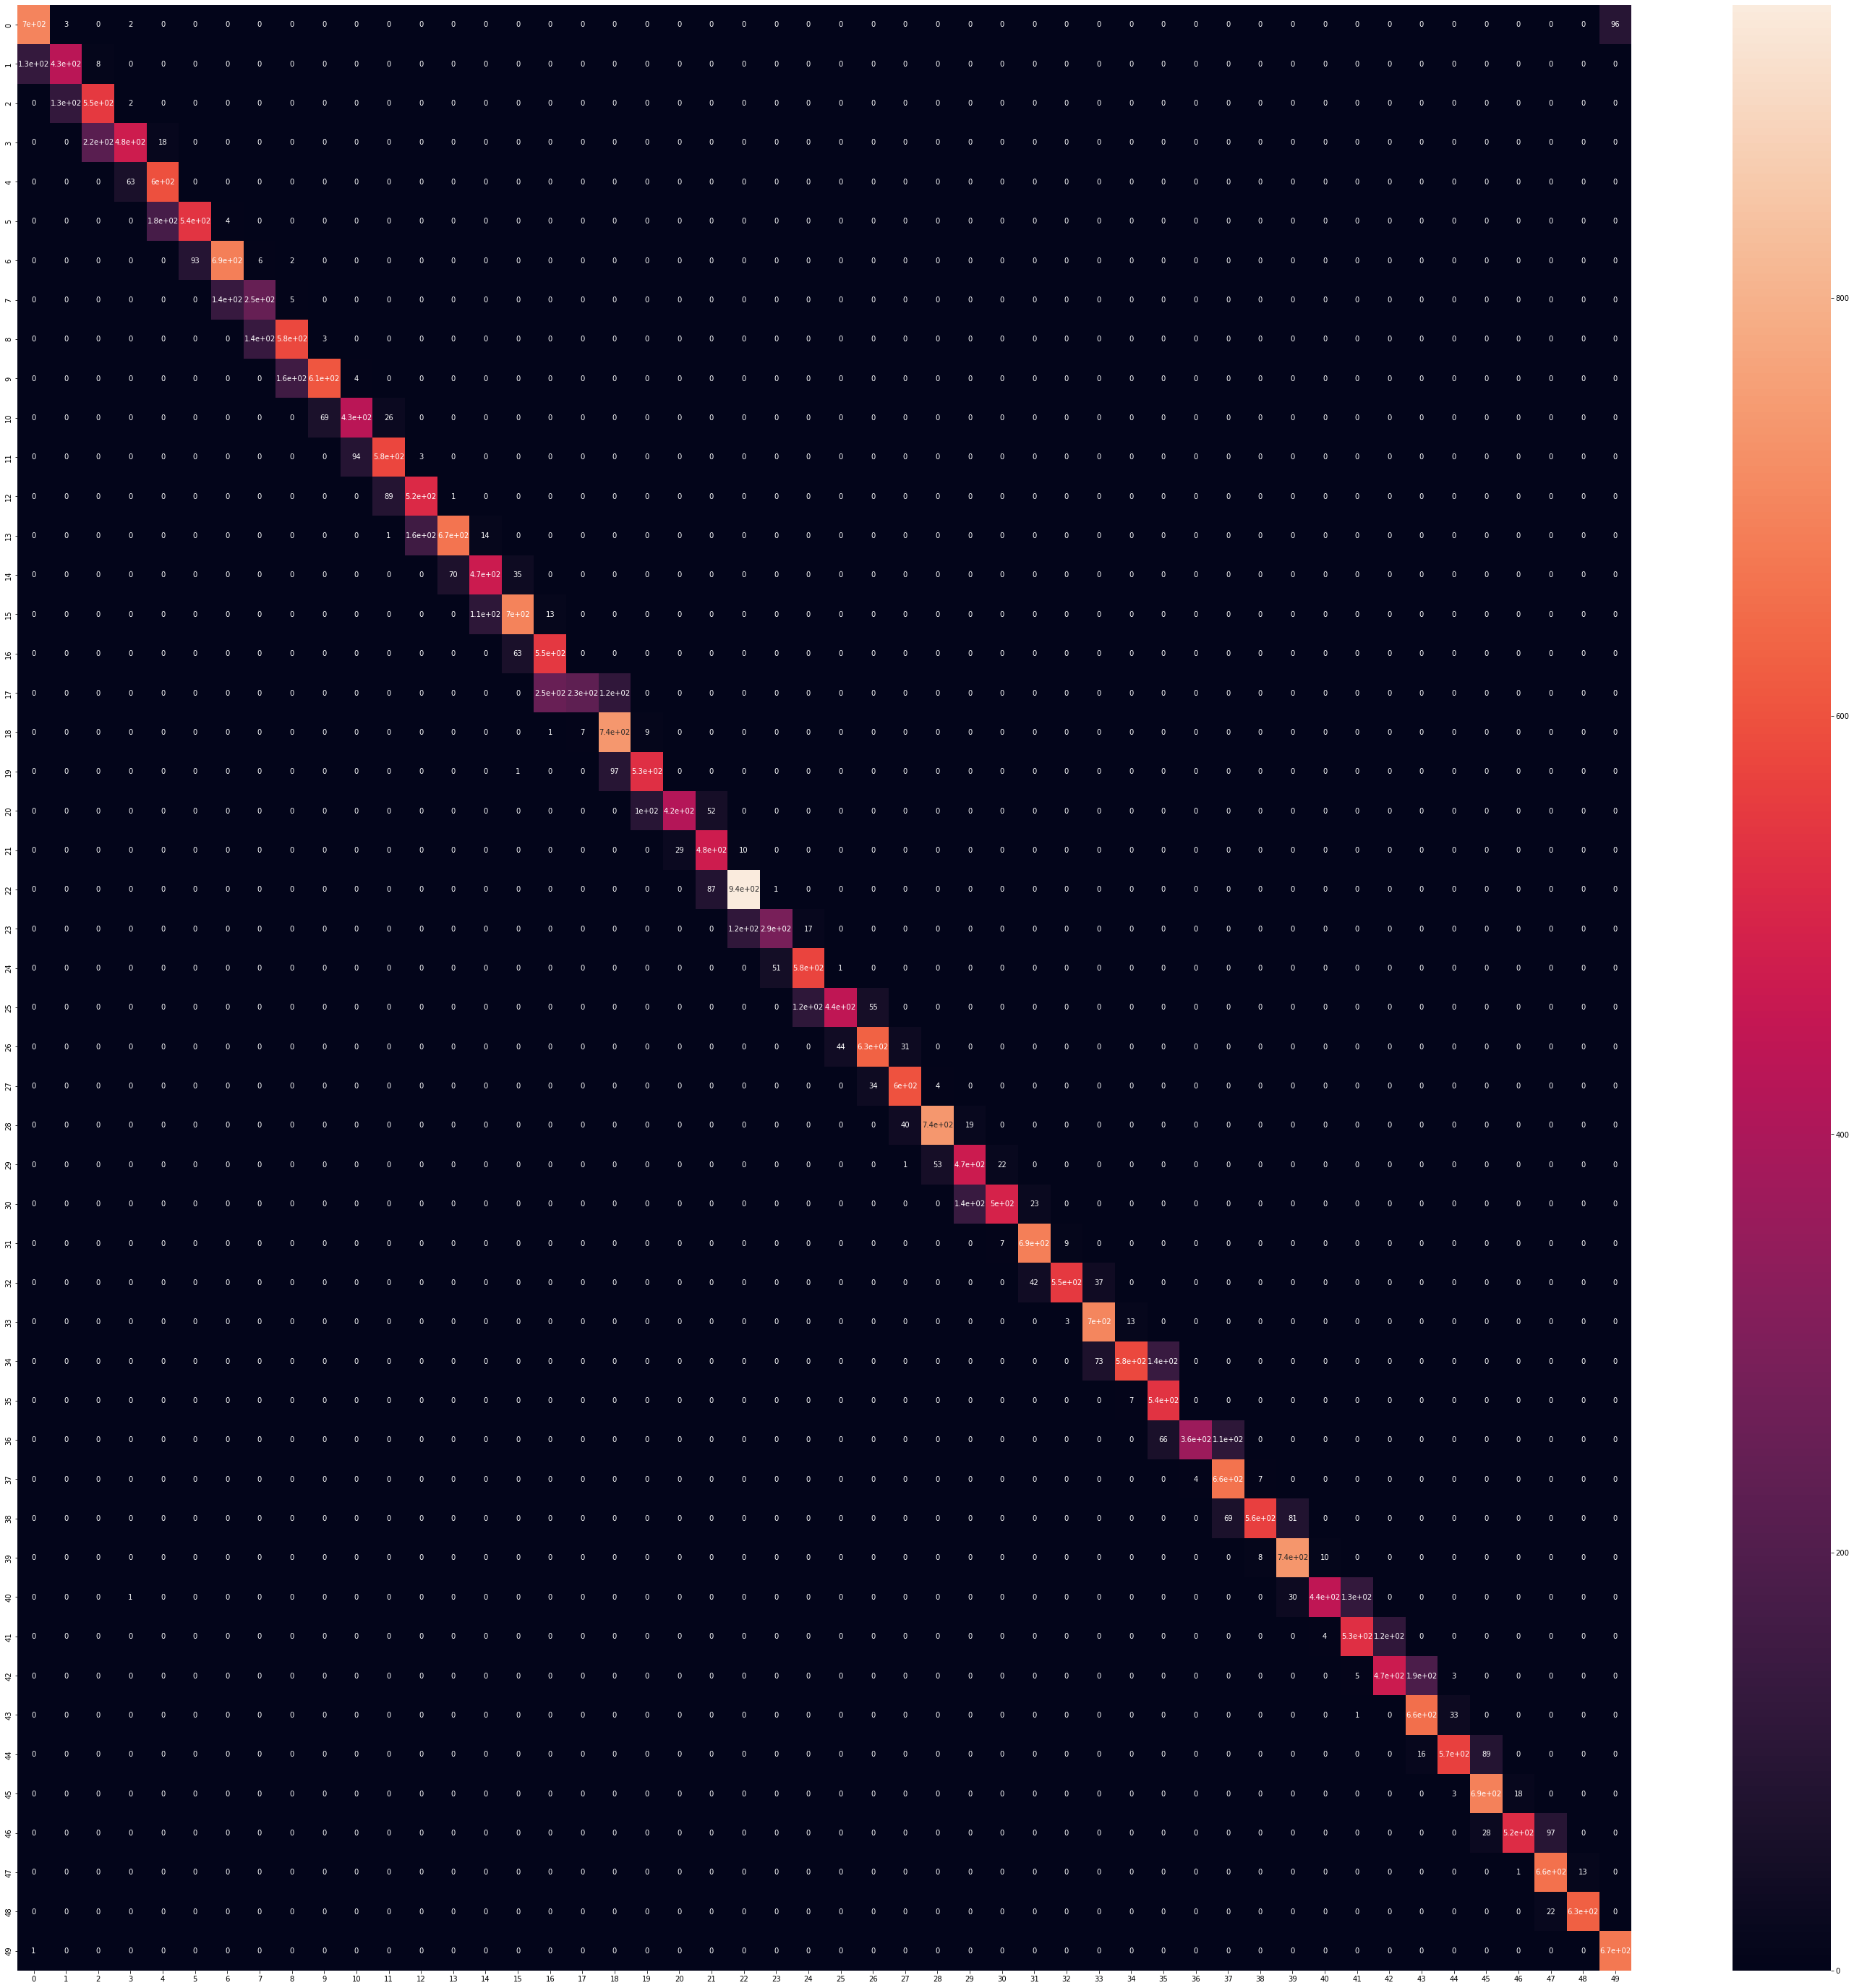

In [73]:
# Confusion matrix 
predict_x=model.predict(X_test) 
y_pred_class=np.argmax(predict_x,axis=1)

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
array = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(output_classes,output_classes))
sn.heatmap(array, annot=True)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       800
           1       0.77      0.76      0.76       569
           2       0.71      0.81      0.76       682
           3       0.87      0.67      0.76       713
           4       0.76      0.90      0.82       658
           5       0.85      0.75      0.80       719
           6       0.83      0.87      0.85       789
           7       0.63      0.64      0.63       389
           8       0.78      0.80      0.79       724
           9       0.89      0.79      0.84       769
          10       0.82      0.82      0.82       528
          11       0.83      0.86      0.84       677
          12       0.76      0.85      0.81       607
          13       0.90      0.80      0.85       838
          14       0.79      0.82      0.80       578
          15       0.88      0.85      0.86       821
          16       0.67      0.90      0.77       612
          17       0.97    